In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color


In [8]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,10)
matplotlib.rcParams["image.cmap"] = "gray"

In [3]:
img = cv2.imread("IMG_0037.jpg")


In [4]:
# img = (img - np.min(img)) / (np.max(img) - np.min(img))
# img
# img = img**(1/1.7)


In [5]:
img.shape, img.dtype

((5000, 1500, 3), dtype('uint8'))

In [6]:
np.min(img), np.max(img)

(0, 255)

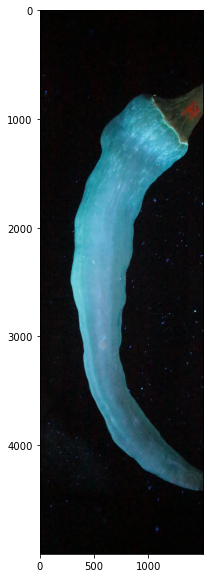

In [7]:
plt.imshow(img[:,:,::-1])

In [145]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the image
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

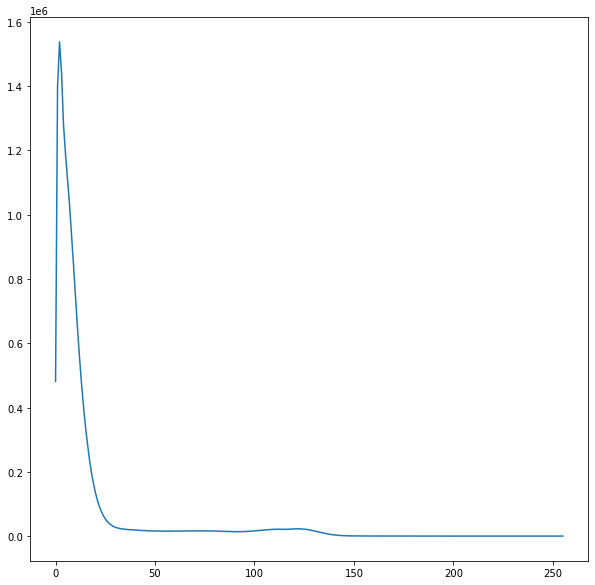

In [146]:
plt.plot(hist)
plt.show()

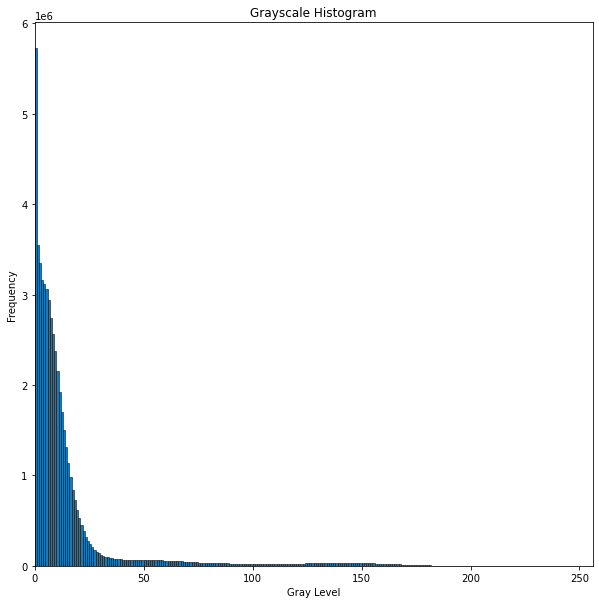

In [147]:
plt.hist(img.ravel(), bins=256, range=[0, 256], edgecolor='black', linewidth=0.5)
plt.xlim([0, 256])
plt.title("Grayscale Histogram")
plt.xlabel("Gray Level")
plt.ylabel("Frequency")
plt.show()

In [148]:
bin_edges = np.arange(0, 256 + 1, 1)


In [149]:
bin_width = np.diff(bin_edges)


In [150]:
bin_centers = bin_edges[:-1] + bin_width / 2  
# [:-1] indexing is used to exclude the last 
# element of bin_edges so that bin_width and bin_edges[:-1] have the same number of elements.


In [151]:
#  you need to normalize the histogram so that it represents a probability distribution.
hist_normalized = cv2.normalize(hist, None, 0, 1, cv2.NORM_MINMAX)


In [152]:
mean = np.sum(hist_normalized * bin_centers)
# The mean of a probability distribution is the weighted average of the bin centers
# where the weight is the probability of each bin
mean

381781.169210447

In [153]:
variance = np.sum(hist_normalized * (bin_centers - mean)**2)
std_dev = np.sqrt(variance)


In [154]:
#  the np.cumsum function from NumPy to calculate the cumulative sum of the histogram, 
# and then find the bin center that corresponds to the cumulative sum closest to 0.5.

cumsum = np.cumsum(hist_normalized)
median_index = np.argmin(np.abs(cumsum - 0.5))
median = bin_centers[median_index]
median

0.5

In [155]:
max_bin = np.argmax(hist)
max_gray_level = max_bin * (256/hist.shape[0])
print("Gray level with maximum repetition: ", max_gray_level)

Gray level with maximum repetition:  2.0


In [156]:
_, binary_img = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)


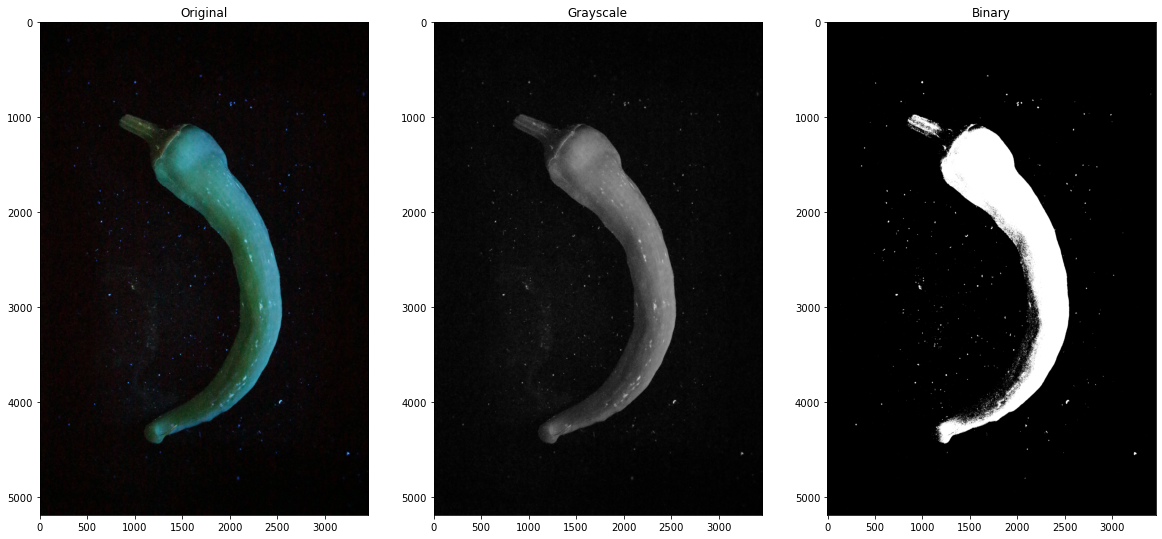

In [158]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(img[:,:,::-1])
plt.title("Original");
plt.subplot(132)
plt.imshow(gray,cmap='gray')
plt.title("Grayscale");
plt.subplot(133)
plt.imshow(binary_img,cmap='gray')
plt.title("Binary");

In [159]:
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

16040

In [160]:
c = max(contours, key=cv2.contourArea) # select the largest contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, [c], -1, 255, -1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [161]:
masked = cv2.bitwise_and(img, img, mask=mask)


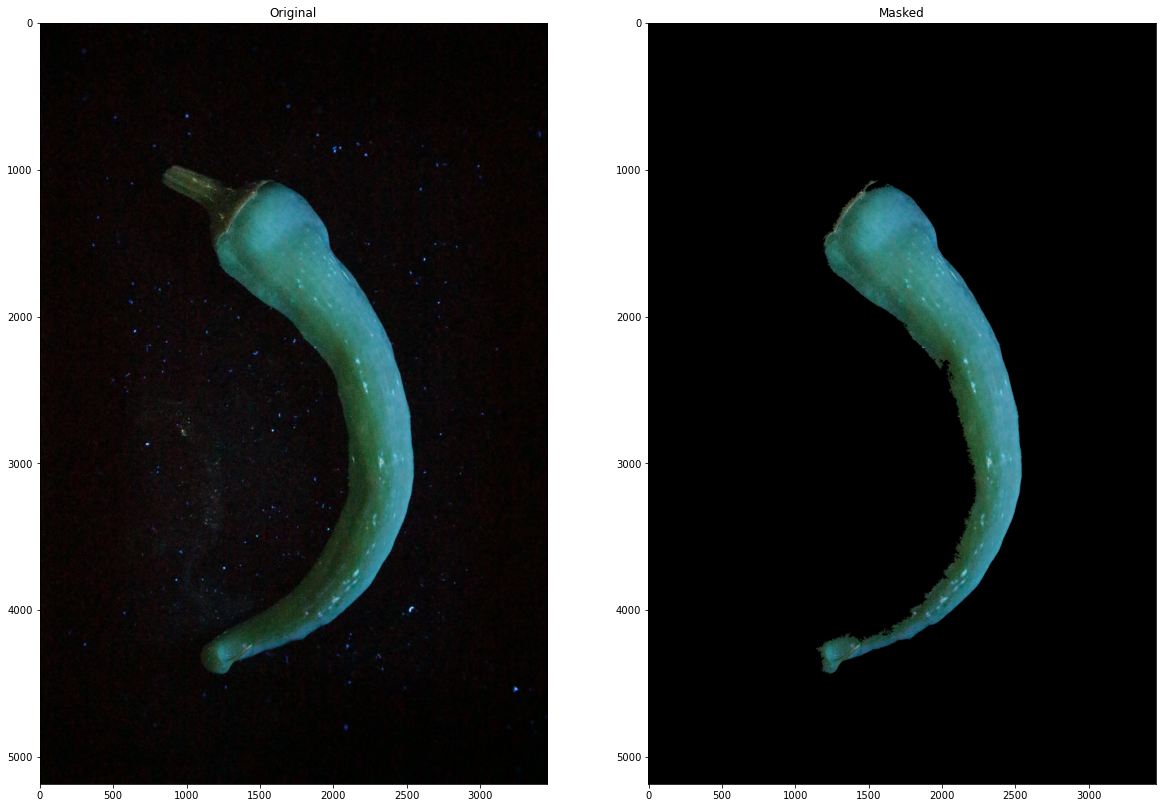

In [162]:
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.title("Original");
plt.subplot(122)
plt.imshow(masked[:,:,::-1])
plt.title("Masked");

In [163]:
# Define the crop coordinates
x, y, w, h = 1000, 0, 1500, 5000

# Crop the image using NumPy slicing
cropped = img[y:y+h, x:x+w].copy()

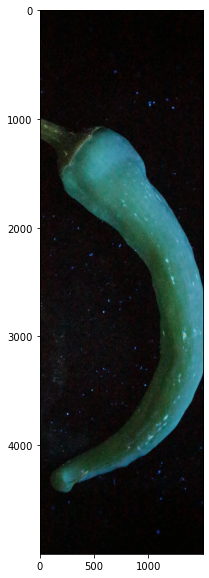

In [164]:
plt.imshow(cropped[:,:,::-1])

In [65]:
# Hue - indicates the color / tint of the pixel

# Saturation - indicates the purity (or richness) of the color

# Value - indicates the amount of brightness of the pixel

In [39]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [40]:
# convert from bgr to HSV format
hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

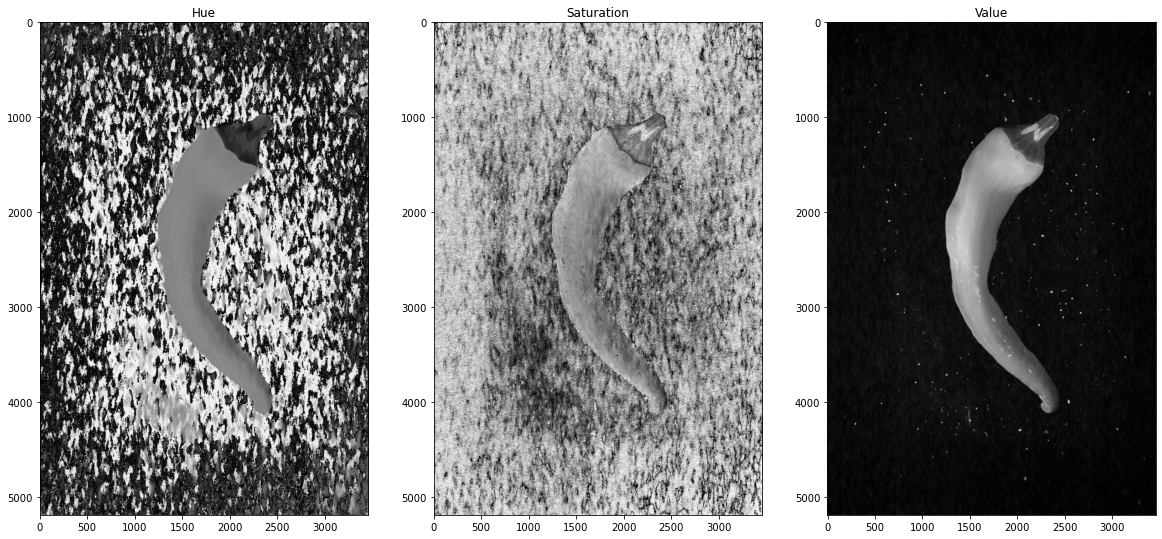

In [41]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(hsvImage[:,:,0],cmap='gray')
plt.title("Hue");
plt.subplot(132)
plt.imshow(hsvImage[:,:,1],cmap='gray')
plt.title("Saturation");
plt.subplot(133)
plt.imshow(hsvImage[:,:,2],cmap='gray')
plt.title("Value");

In [42]:
H, S, V = cv2.split(hsvImage)
print(H.shape)

(5184, 3456)


In [43]:
# Remove unsaturated (white/gray) pixels 
H_array = H[S > 10].flatten()
H_array.shape

# The line H_array = H[S > 10].flatten() is selecting only the hue values from the H array 
# where the corresponding saturation values in S are 
# greater than 10, and then converting the resulting 2D array into a 1D array using the flatten function.

(17123288,)

Text(0.5, 1.0, 'Histogram')

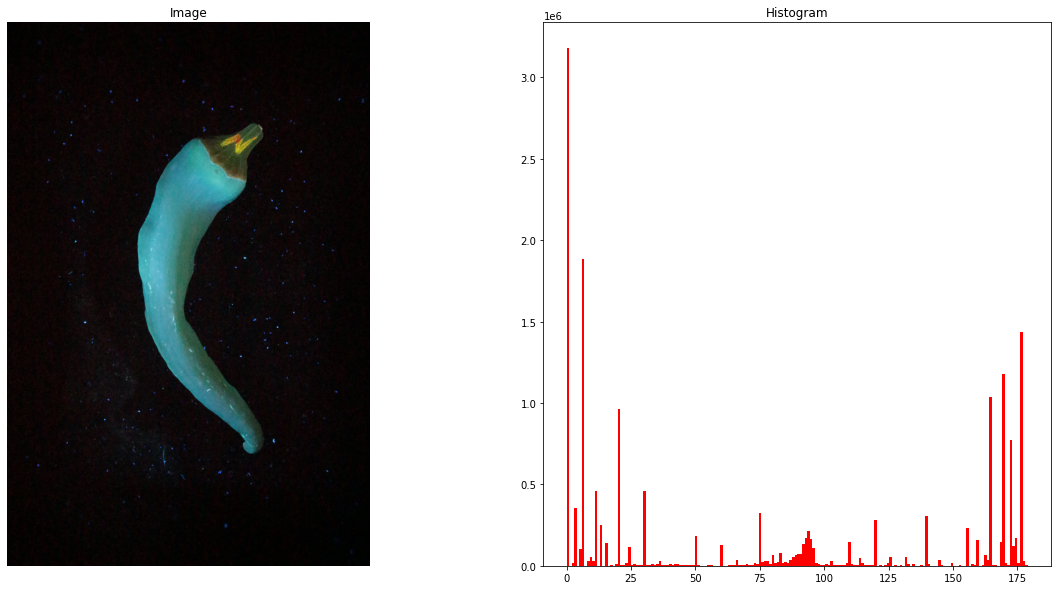

In [45]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Image");plt.axis('off')
plt.subplot(122);plt.hist(H_array, bins=180, color='r');plt.title("Histogram")

In [46]:
_, imgBthresh = cv2.threshold(imgG, 50, 255, cv2.THRESH_OTSU)
plt.imshow(imgBthresh)

NameError: name 'imgG' is not defined

In [30]:
cnts, her = cv2.findContours(imgBthresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(cnts))

5640


In [3]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("image/C_6.jpg")



In [4]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the image
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])



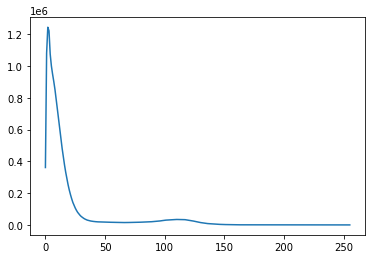

In [5]:
# Plot the histogram
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()

In [6]:
# Get the threshold values by analyzing the histogram
threshold1 = np.argmax(hist[:128])
threshold2 = np.argmax(hist[128:]) + 128
print(threshold1, threshold2)

# Threshold the image using the calculated threshold values
ret, thresholded = cv2.threshold(gray, threshold1, threshold2, cv2.THRESH_BINARY)

2 128


Text(0.5, 1.0, 'thresholded')

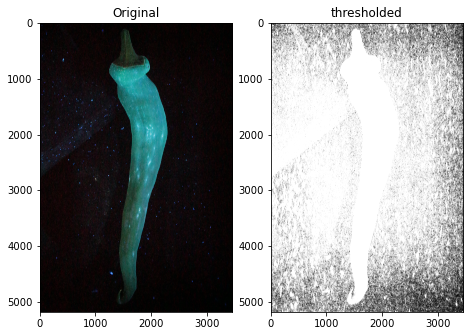

In [9]:
# Show the original and thresholded images
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(img[:,:,::-1])
plt.title("Original")
plt.subplot(152)
plt.imshow(thresholded)
plt.title("thresholded")

In [16]:
import cv2

# Load the image
img = cv2.imread("image/C_6.jpg")

# Load the image
img_gray = cv2.imread("./image/C_6.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
ret, thresholded_img = cv2.threshold(img_gray, 10, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


In [ ]:
# convert the thresholded image into a binary image, where the pixels that
#meet the threshold criteria are set to 1 and the pixels that do not meet the criteria are set to 0.
mask = thresholded_img.astype(np.uint8) 

Text(0.5, 1.0, 'mask')

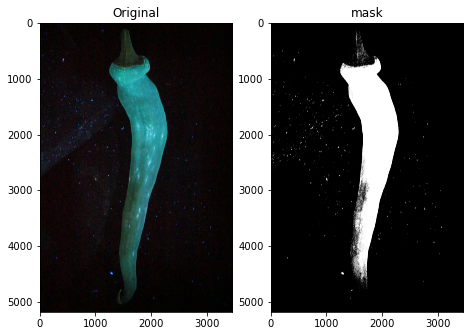

In [17]:
original_image = img.copy()
# Show the original and thresholded images
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(img[:,:,::-1])

plt.title("Original")
plt.subplot(152)
plt.imshow(mask)
plt.title("mask")

In [18]:
# you can use the binary mask to extract specific information or features from the original image.
masked_image = cv2.bitwise_and(original_image, original_image, mask = mask)


Text(0.5, 1.0, 'mask overlay')

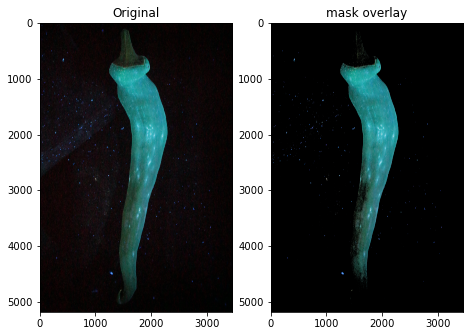

In [19]:
original_image = img.copy()
# Show the original and thresholded images
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(original_image[:,:,::-1])

plt.title("Original")
plt.subplot(152)
plt.imshow(masked_image[:,:,::-1])
plt.title("mask overlay")

In [58]:
# Convert the image from the RGB color space to the CIELAB color space.
lab_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2LAB)
lab_image.shape

(5184, 3456, 3)

Text(0.5, 1.0, 'l*a*b*')

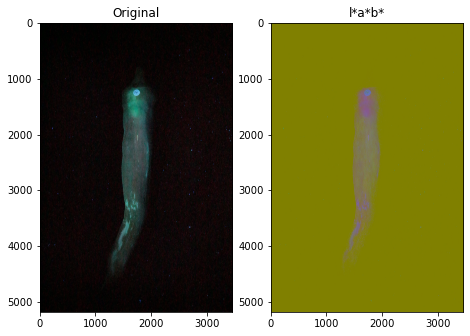

In [43]:
# Show the original and thresholded images
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(img.copy()[:,:,::-1])
plt.title("Original")
plt.subplot(152)
plt.imshow(lab_image)
plt.title("l*a*b*")

In [59]:
# extract the L, A, and B channels
L, A, B = cv2.split(lab_image)

# print the mean values of the L, A, and B channels
print("L:", np.mean(L))
print("A:", np.mean(A))
print("B:", np.mean(B))


L: 5.139044393182727
A: 127.30124748379987
B: 127.93359788040839


In [63]:
# standard deviation
l_std = np.std(L)
a_std = np.std(A)
b_std = np.std(B)
# min values
l_min = np.min(L)
a_min = np.min(A)
b_min = np.min(B)
# max values
l_max = np.max(L)
a_max = np.max(A)
b_max = np.max(B)

In [65]:
print("l_std: ", l_std)
print("a_std: ", a_std)
print("b_std: ", b_std)

print(" ")

# min values
print("l_min: ", l_min)
print("a_min: ", a_min)
print("b_min: ", b_min)

print(" ")

# max values
print("l_max: ", l_max)
print("a_max: ", a_max)
print("b_max: ", b_max)

l_std:  20.543123636777306
a_std:  3.370889297996562
b_std:  1.2199532172234024
 
l_min:  0
a_min:  86
b_min:  48
 
l_max:  250
a_max:  187
b_max:  160


In [62]:
from skimage import color

# convert the ROI to the CIELAB color space
lab_image_skimage = color.rgb2lab(masked_image)

# extract the L, A, and B channels
L1, A1, B1 = cv2.split(lab_image_skimage)

# print the mean values of the L, A, and B channels
print("L1:", np.mean(L1))
print("A1:", np.mean(A1))
print("B1:", np.mean(B1))


L: 2.086344107053935
A: -0.4084552654960738
B: 1.0291769761565568


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'l1*a1*b1*')

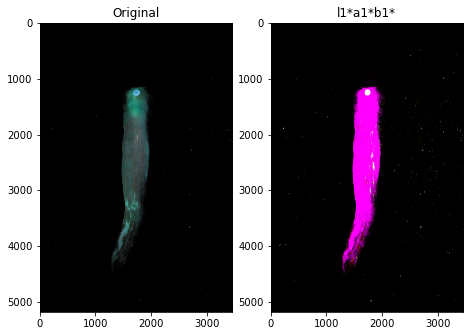

In [70]:
# Show the original and thresholded images
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(masked_image.copy()[:,:,::-1])
plt.title("Original")
plt.subplot(152)
plt.imshow(lab_image_skimage)
plt.title("l1*a1*b1*")

In [71]:
# standard deviation
l_std1 = np.std(L1)
a_std1 = np.std(A1)
b_std1 = np.std(B1)
# min values
l_min1 = np.min(L1)
a_min1 = np.min(A1)
b_min1 = np.min(B1)
# max values
l_max1 = np.max(L1)
a_max1 = np.max(A1)
b_max1 = np.max(B1)

In [72]:
print("l_std1: ", l_std1)
print("a_std1: ", a_std1)
print("b_std1: ", b_std1)

print(" ")

# min values
print("l_min1: ", l_min1)
print("a_min1: ", a_min1)
print("b_min1: ", b_min1)

print(" ")

# max values
print("l_max1: ", l_max1)
print("a_max1: ", a_max1)
print("b_max1: ", b_max1)

l_std1:  8.35851284776781
a_std1:  2.1802137281791585
b_std1:  4.923897672485648
 
l_min1:  0.0
a_min1:  -28.910181615930842
b_min1:  -61.77361131587612
 
l_max1:  98.98362061651609
a_max1:  65.37041741587463
b_max1:  64.76867659313662


In [ ]:
# For example, a high standard deviation value for a 
# channel means that the color information in that channel is dispersed over a wide range of values, 
# while a low standard deviation value means that the color information is concentrated around a specific value.

# Also, the minimum and maximum values can give you an idea of the range of color information in the image, 
# and can be useful for setting threshold values or for identifying outliers.

In [52]:
masked_image.shape


(5184, 3456, 3)

In [53]:
B, G, R = cv2.split(masked_image)

In [54]:
# print the mean values of the L, A, and B channels
print("B:", np.mean(B))
print("G:", np.mean(G))
print("R:", np.mean(R))

B: 4.863040067640461
G: 5.08755366181913
R: 3.2362599732617454


In [55]:
print("B_std:", np.std(B))
print("G_std:", np.std(G))
print("R_std:", np.std(R))

B_std: 19.638009558886043
G_std: 20.404225240838347
R_std: 13.09492818934115


In [56]:
# min and maax 
print("B_min: ", np.min(B))
print("G_min: ", np.min(G))
print("R_min: ", np.min(R))

B_min:  0
G_min:  0
R_min:  0


In [57]:
print("B_max:", np.max(B))
print("G_max:", np.max(G))
print("R_max:", np.max(R))

B_max: 255
G_max: 253
R_max: 233
